In [1]:
from tslearn.metrics import dtw
#print(dtw(arr1,arr2)*100/<lengthOfArray>)

In [335]:
import os
filenames = []
cors = []
for r,d,f in os.walk("./"):
    print(r)
    for file in f:
        if file.endswith('.csv'):
            filenames.append(r + '/' + file)
            
    


./
./celltrion
./.ipynb_checkpoints
./kbfinancial
./sktelecom
./koreaelectric
./samsungelectronics
./posco
./hyundaimotor
./lgchem
./skhynix


In [332]:
cors

[]

In [46]:
import pandas as pd
df_list = [pd.read_csv(filename, delimiter=';', engine='python', encoding='utf-8').sort_index(axis=0, ascending=False).reset_index() for filename in filenames]


In [48]:
df_list = [df[df['Vol.'] != '-'].reset_index() for df in df_list]

In [50]:
df_list = [df['Price'] for df in df_list]

In [51]:
dtw(df_list[0],df_list[1])

2765072.2706987243

In [52]:
dtw(df_list[1], df_list[2])

3381339.1958660404

In [53]:
dtw(df_list[0], df_list[3])

3044595.95921807

In [316]:
(df_list[0]-df_list[0].min())/(df_list[0].max()-df_list[0].min())

0      0.738811
1      0.806950
2      0.814517
3      0.806950
4      0.757737
5      0.761529
6      0.772880
7      0.772880
8      0.742602
9      0.655537
10     0.659320
11     0.640394
12     0.674463
13     0.659320
14     0.716100
15     0.716100
16     0.757737
17     0.799382
18     0.788023
19     0.719884
20     0.723676
21     0.700958
22     0.727459
23     0.704749
24     0.803166
25     0.761529
26     0.784239
27     0.799382
28     0.757737
29     0.761529
         ...   
216    0.335907
217    0.324324
218    0.293436
219    0.289575
220    0.308880
221    0.258687
222    0.270270
223    0.289575
224    0.266409
225    0.274131
226    0.254826
227    0.289575
228    0.274131
229    0.169884
230    0.142857
231    0.162162
232    0.138996
233    0.100386
234    0.138996
235    0.108108
236    0.077220
237    0.108108
238    0.108108
239    0.088803
240    0.073359
241    0.057915
242    0.111969
243    0.065637
244    0.050193
245    0.000000
Name: Price, Length: 246

In [23]:
import matplotlib.pyplot as plt

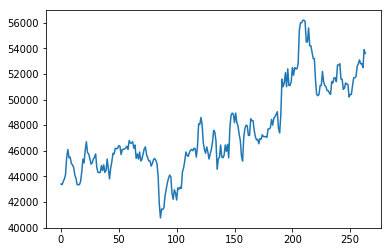

In [26]:
plt.plot(df_list[1])

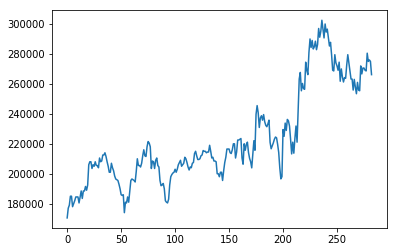

In [27]:
plt.plot(df_list[0])

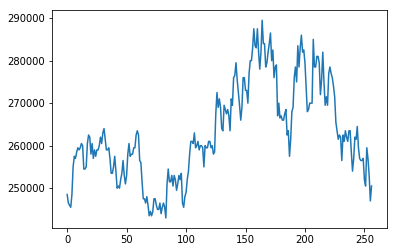

In [28]:
plt.plot(df_list[2])

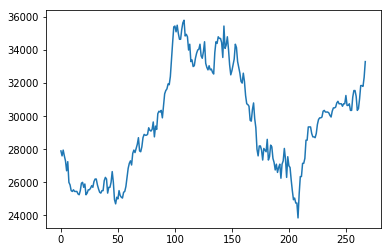

In [29]:
plt.plot(df_list[3])

In [61]:
import statsmodels.tsa

In [298]:
result=statsmodels.tsa.stattools.grangercausalitytests(x, 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=14.2383 , p=0.0002  , df_denom=242, df_num=1
ssr based chi2 test:   chi2=14.4148 , p=0.0001  , df=1
likelihood ratio test: chi2=14.0067 , p=0.0002  , df=1
parameter F test:         F=14.2383 , p=0.0002  , df_denom=242, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.2390  , p=0.0001  , df_denom=239, df_num=2
ssr based chi2 test:   chi2=18.8646 , p=0.0001  , df=2
likelihood ratio test: chi2=18.1709 , p=0.0001  , df=2
parameter F test:         F=9.2390  , p=0.0001  , df_denom=239, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=6.3701  , p=0.0004  , df_denom=236, df_num=3
ssr based chi2 test:   chi2=19.6772 , p=0.0002  , df=3
likelihood ratio test: chi2=18.9211 , p=0.0003  , df=3
parameter F test:         F=6.3701  , p=0.0004  , df_denom=236, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=4.7490  , p=0.0011  

In [297]:
import numpy as np
x= np.concatenate((np.expand_dims(df_list[1],1), np.expand_dims(df_list[0],1)), axis=1)

In [42]:
df_list[0].values.expands_dim(1)

AttributeError: 'numpy.ndarray' object has no attribute 'expands_dim'

In [45]:
np.expand_dims(df_list[0],1).size

283

In [85]:
result

{1: ({'lrtest': (4.547473508864641e-13, 0.9999994619468846, 1),
   'params_ftest': (4769.952337884648, 1.0213684903812106e-161, 243.0, 1.0),
   'ssr_chi2test': (3.613962816506691e-13, 0.999999520341769, 1),
   'ssr_ftest': (3.5844610792290855e-13, 0.9999995101472762, 243.0, 1)},
   array([[0., 1., 0.]])])}

In [84]:
result[1][0]['params_ftest']

(4769.952337884648, 1.0213684903812106e-161, 243.0, 1.0)

In [78]:
sim_mat = np.zeros((9,9))

In [317]:
df_list = [(df-df.min())/(df.max()-df.min()) for df in df_list]

In [319]:
for i in range(9):
    for j in range(9):
        #x= np.concatenate((np.expand_dims(df_list[i],1), np.expand_dims(df_list[j],1)), axis=1)
        #result = statsmodels.tsa.stattools.grangercausalitytests(x, 5, verbose=False)
        #results = [1-result[i+1][0]['ssr_ftest'][1] for i in range(5)]
        #sim_mat[i,j] = np.array(results).mean()
        sim_mat[i,j] = dtw(df_list[i], df_list[j])

In [301]:
sim_mat = sim_mat * 100

In [308]:
from sklearn import cluster

In [320]:
c = cluster.AgglomerativeClustering(3, 'precomputed',linkage='complete')
c.fit(sim_mat).labels_

array([2, 2, 0, 0, 1, 2, 1, 0, 1])

In [304]:
dbscan=cluster.OPTICS( min_samples=2, min_cluster_size=2, metric='precomputed')

In [305]:
dbscan.fit(sim_mat).labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0])

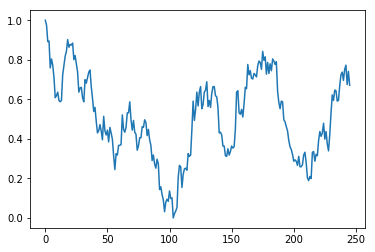

In [327]:
plt.plot(df_list[8])

In [311]:
sim_mat

array([[    0.        , 27650.72270699,  5805.33598184, 30445.95959218,
        28173.32640777,  4311.28678088, 16049.45341152, 19607.82537531,
        23860.01874494],
       [27650.72270699,     0.        , 33813.39195866,  2858.86686469,
          406.50522752, 34218.91196035, 12287.33680461, 48344.2057102 ,
         3795.0837606 ],
       [ 5805.33598184, 33813.39195866,     0.        , 36584.29572918,
        34296.46772993,  3698.68895691, 21835.41900216, 14318.15717891,
        29969.6050024 ],
       [30445.95959218,  2858.86686469, 36584.29572918,     0.        ,
         2280.95643317, 36990.06953224, 15027.46628677, 51083.4654169 ,
         6753.74029705],
       [28173.32640777,   406.50522752, 34296.46772993,  2280.95643317,
            0.        , 34702.34738098, 12709.95400267, 48792.94240718,
         4379.57743395],
       [ 4311.28678088, 34218.91196035,  3698.68895691, 36990.06953224,
        34702.34738098,     0.        , 22323.55444368, 11771.75220602,
        303